### Bike Sharing Assignment

#### <font color= Purple>Problem Statement:</font>
`Context`: BoomBikes, a bike-sharing provider, aims to accelerate its revenue post the Covid-19 lockdown. To achieve this, the company wants to comprehend the factors affecting the demand for shared bikes in the American market. This understanding will help BoomBikes tailor its services to meet customer expectations and stand out in the market.

`Objective`: The goal is to build a multiple linear regression model that accurately predicts the demand for shared bikes. This model will be used by the management of BoomBikes to understand how different features influence bike demand, allowing them to optimize their business strategy.

`Data Overview`: The dataset contains information on daily bike demands across the American market, considering various factors such as weather, season, year, temperature, etc. The target variable is 'cnt,' representing the total number of bike rentals, including both casual and registered users.

### Loading, reading and understanding Data

In [1]:
# Importing libraries for reading the data and suppressing warning 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Checking for null columns
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### <font color= purple>Observations:</font>
- The dataset consist of 730 rows and 16 columns.
- There are no null values in any of the columns
- The 'dteday' coulumn is an onject whereas the rest are either float or int datatypes

##### Duplicate check

In [8]:
# Making a copy of the dataset
df_dup = df.copy()

# Dropping the duplicate rows if any
df_dup.drop_duplicates(subset=None, inplace=True)

In [9]:
# Checing the shape of the duplicate df
df_dup.shape

(730, 16)

##### The shape of the original and copy is the same, indicating that there are no duplicate rows

### Excluding irrelevant or redundant columns
After looking at the dataset and the dictionary that was provided, we can exclude the follwing columns for further analysis:
- `instant`: It is just an index column
- `dteday`: We already have a year(yr) and and month(mnth) column, so this column is redundant.
- `casual and registered`: These columns are redundant as well since the 'cnt' column has records of both casual and registered users. 

#### Ctreating a new dataset with the relevant variables
We will create a new dataset named `'Bike_df'` that will contain only the varibale that will be futher used for analysis. The original dataset will be kept for additional analysis and validation if needed. 

In [13]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
# Creating a new dataframe 'Bike_df' that contains the relevant variables excluding 'instant', 'dteday','casual',and 'registered'
Bike_df = df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [11]:
Bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
Bike_df.shape

(730, 12)

In [13]:
# Checking for outliers 
for k,v in Bike_df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    v_col = v[(v <= lb) | (v >= ub)]
    percentage = np.shape(v_col)[0] * 100.0 / np.shape(Bike_df)[0]
    print("Column %s outliers = %.2f%%" % (k, percentage))

Column season outliers = 0.00%
Column yr outliers = 0.00%
Column mnth outliers = 0.00%
Column holiday outliers = 100.00%
Column weekday outliers = 0.00%
Column workingday outliers = 0.00%
Column weathersit outliers = 0.00%
Column temp outliers = 0.00%
Column atemp outliers = 0.00%
Column hum outliers = 0.27%
Column windspeed outliers = 1.78%
Column cnt outliers = 0.00%


#### Note:
From the above outlier check, we do not have to worry about outliers as they are negligible and outliers for the variable such as 'holiday', 'yr' and 'workingday' which have binary values (0 or 1) can be ignored as they are meaningless. The column 'holiday' with 100% outlier indicates that there might be an issue with the way outliers are being calculated for this binary categorical column. Since it has only two values (0 or 1), the concept of outliers might not be applicable.


## Exploratory Data Analysis(EDA)
#### Visualising the Data

Let's **understand the data** by visualizing it.
- To check for multicollinearity


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Encoding
Some columns such as season, mnth, weekday, and weathersit have numeric values even though they should be categorical according to the dictionary. We will map the actual values onto categorical description so as to improve the readability when we visualize it. Weathersit is a cluster of wheater conditions that are not the same but evoke a similar level of intensity such as Clear, Few clouds, Partly cloudy, Partly cloudy which can be described as fair weather whereas eavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog as harsh weather. Therefore, after cross referencing the dictionary the weather situation will be represented by the level of intensity or severity such as fair wether, moderate, unfavourable or harsh. 

In [15]:
# Encoding the column 'season'

Bike_df.season = Bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [16]:
# Encoding the column 'month'
Bike_df.mnth = Bike_df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [17]:
# Encoding the column 'weekday'
Bike_df.weekday = Bike_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [18]:
# Encoding the column 'weathersit'
Bike_df.weathersit = df.weathersit.map({1:'fair_weathr',2:'Moderate_weathr',3:'unfavorable_weathr',4:'Harsh_weathr'})

In [19]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [20]:
Bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Moderate_weathr,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Moderate_weathr,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,fair_weathr,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,fair_weathr,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,fair_weathr,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
Bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [23]:
# Dividing numerical and categorical variable to make EDA easier 
num_cols = ["temp","atemp","hum","windspeed","cnt"]
cat_cols = ["season","yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

### Univariate analysis

Univariate analysis on numerical variables

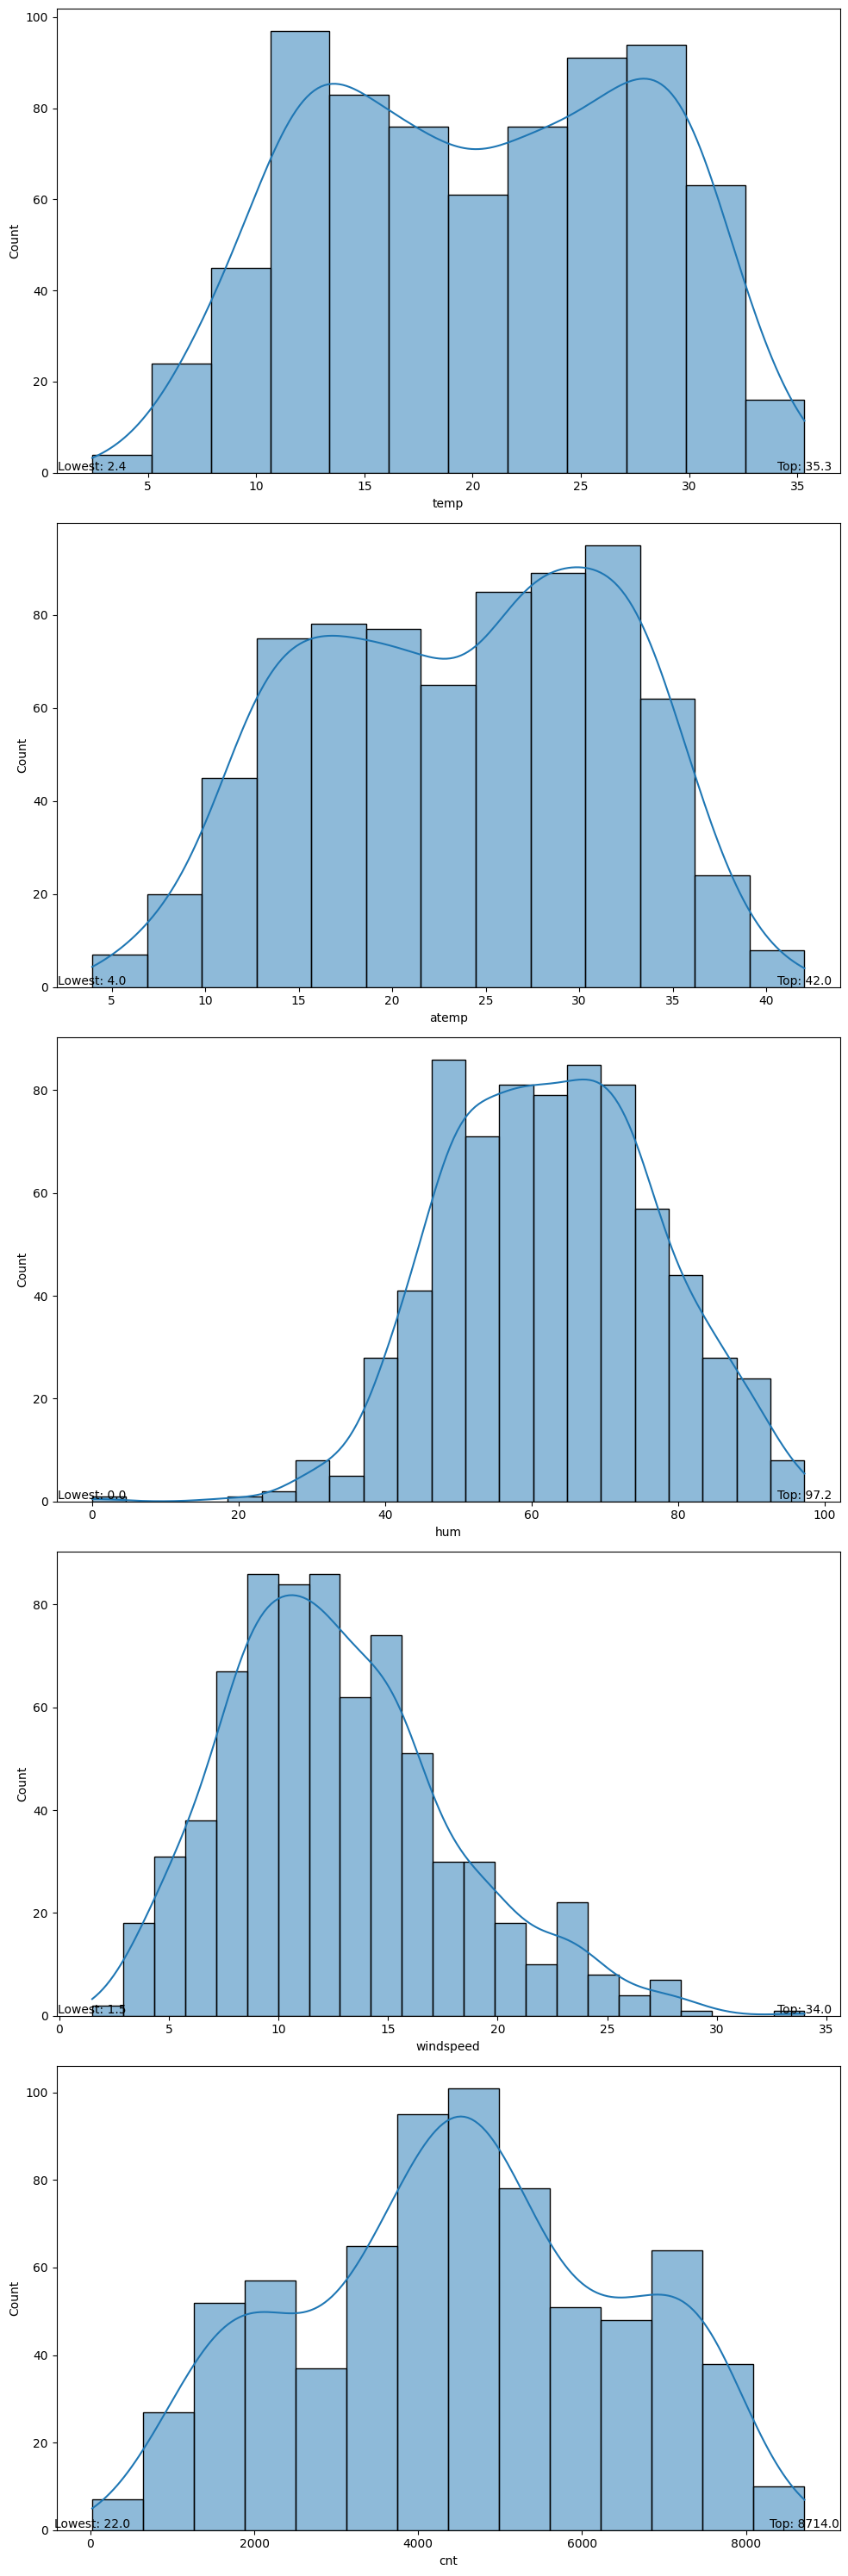

In [24]:
# Numerical columns/variables
# First, Create subplots for each numerical column
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(10, 6 * len(num_cols)))

# Iterate through each numerical column
for i, column in enumerate(num_cols):
    # Plot the histogram for the current column
    sns.histplot(data=Bike_df, x=column, kde=True, ax=axes[i])
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)

    # Add centered percentage labels to the x-axis for the top and lowest values
    top_value = df[column].max()
    lowest_value = df[column].min()
    top_label = f'Top: {top_value:.1f}'
    lowest_label = f'Lowest: {lowest_value:.1f}'
    axes[i].annotate(top_label, (top_value, 0), ha='center', va='bottom')
    axes[i].annotate(lowest_label, (lowest_value, 0), ha='center', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

### <font color= purple>Observations:</font>
The above histogram plots show the distribution of the numerical variables
- temp- Highest is 35.3 Celcius and the lowest is 2.4 celcius . The highest count between 10 to 15 celcius.
- atemp- Highest is 42 Celcius and the lowest is 4 celcius . The highest count between 30 to 35 celcius.
- hum(humidity)- Highest is 97.2 and the lowest is 0 . The highest count between 50 to 60.
- windspeedt- Highest is 34 and the lowest is 1.5 . The highest count between 8 to 13.
- cnt- The largest count being 8714 and the smallest being 22. The highest count being 4000 to 5000.  

Univariate analysis on categorical variables

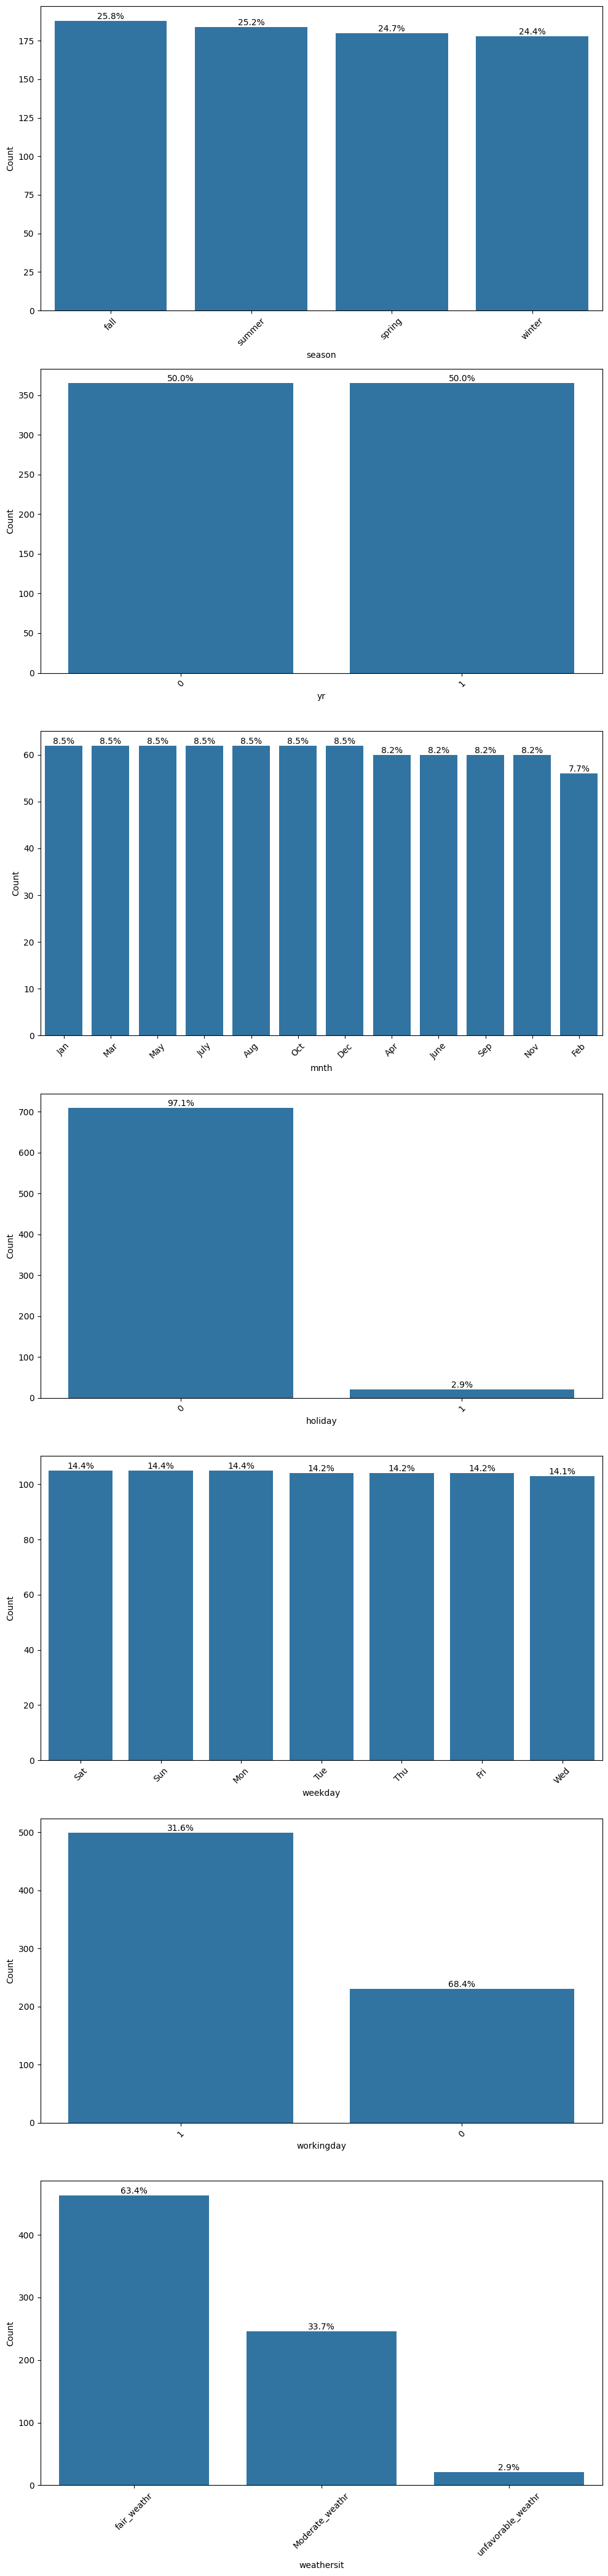

In [25]:
## For the rest of the categorical columns
# Create subplots for each categorical column
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10, 6 * len(cat_cols)))

# Iterate through each categorical column
for i, column in enumerate(cat_cols):
    counts = Bike_df[column].value_counts()
    total_count = counts.sum()
    percentage_counts = counts / total_count * 100

    # Plot the countplot for the current column
    sns.countplot(data=Bike_df, x=column, order=counts.index, ax=axes[i])
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)

    # Add centered percentage labels to the countplot
    for j, count in enumerate(counts):
        axes[i].text(j, count, f'{percentage_counts[j]:.1f}%', ha='center', va='bottom')
    axes[i].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for readability

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

### <font color= purple>Observations:</font>
- Season- Fall recorded 25.8 % as the highest and winter 24.4% as the lowest
- yr - Both 2018 nd 2019 contribute 50% to the data. 
- Month- The months jan, mar, may, july, aug, oct and dec constitute 8.5% of the data while feb consist of the lowest at 7.7%
- Holiday - 97.1 % of that data is when it is not a holiday and 2.9% is a holiday which can skew the data introducing bias and cannot be relied on. 
- weathersit - 63.4 % of the data is recorded on a fair_weather while 2.9% on an unfavorable_weather. 


### Bivariate Analysis

#### Visualising numerical variables

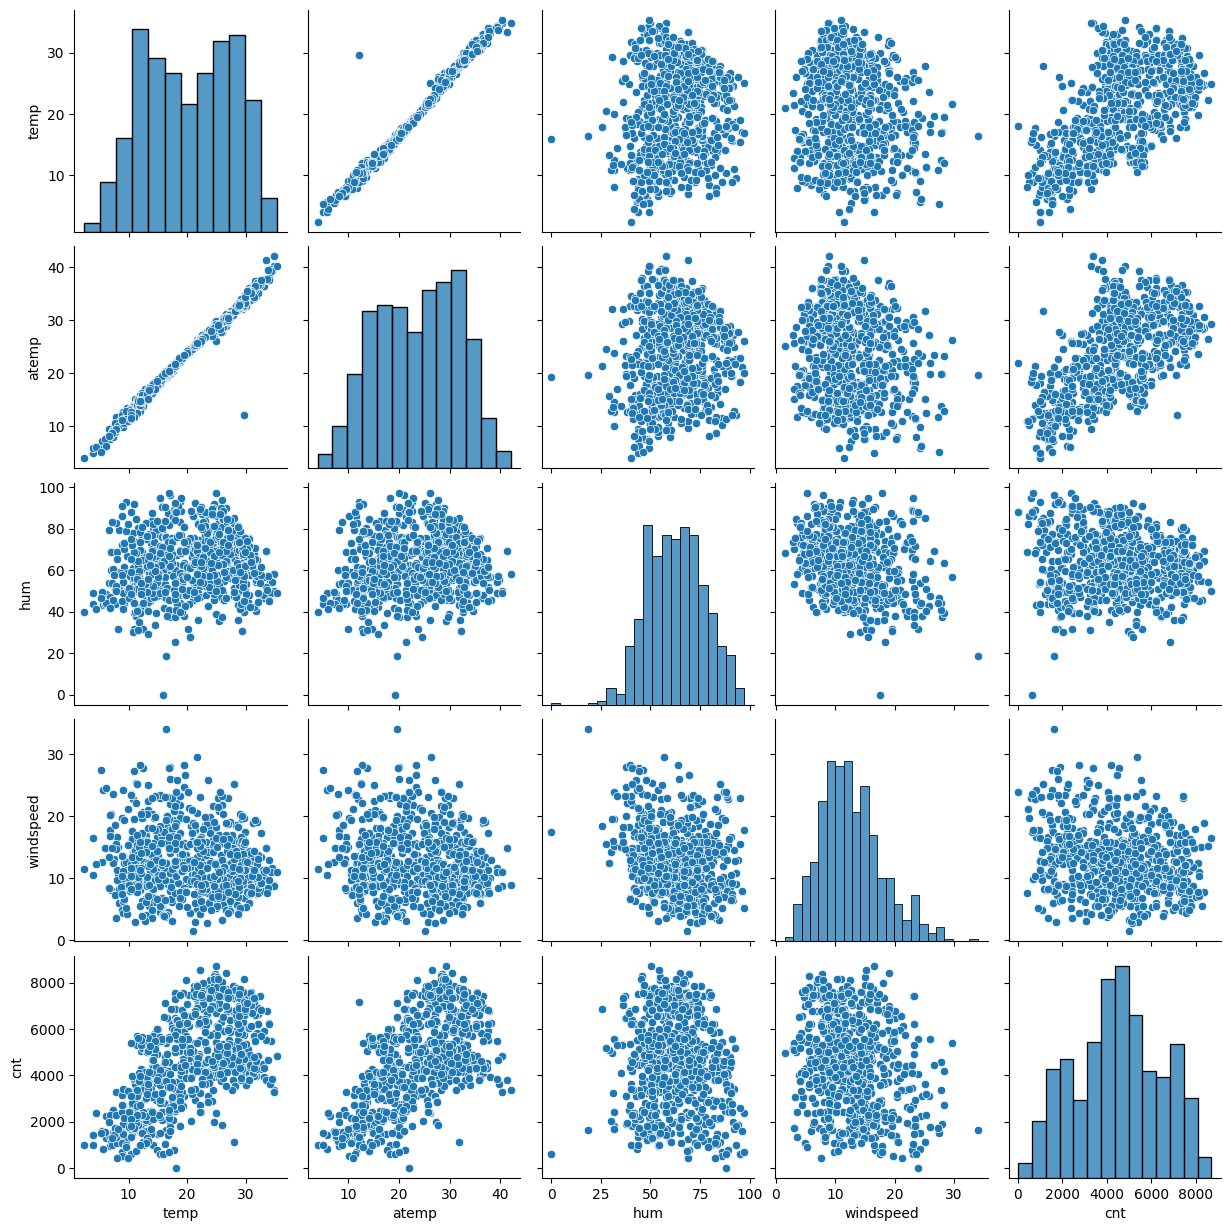

In [26]:
# Visualising numerical variables
sns.pairplot(data=df,vars=Bike_df[num_cols])
plt.show()

### <font color= purple>Observations:</font>
- From the above pairplots we can see that the variables 'temp','atemp' and 'cnt' have a linear relationship

#### Visualising categorical variables
Using Boxplot to study the effect of categorical variables on the target variable 'cnt'

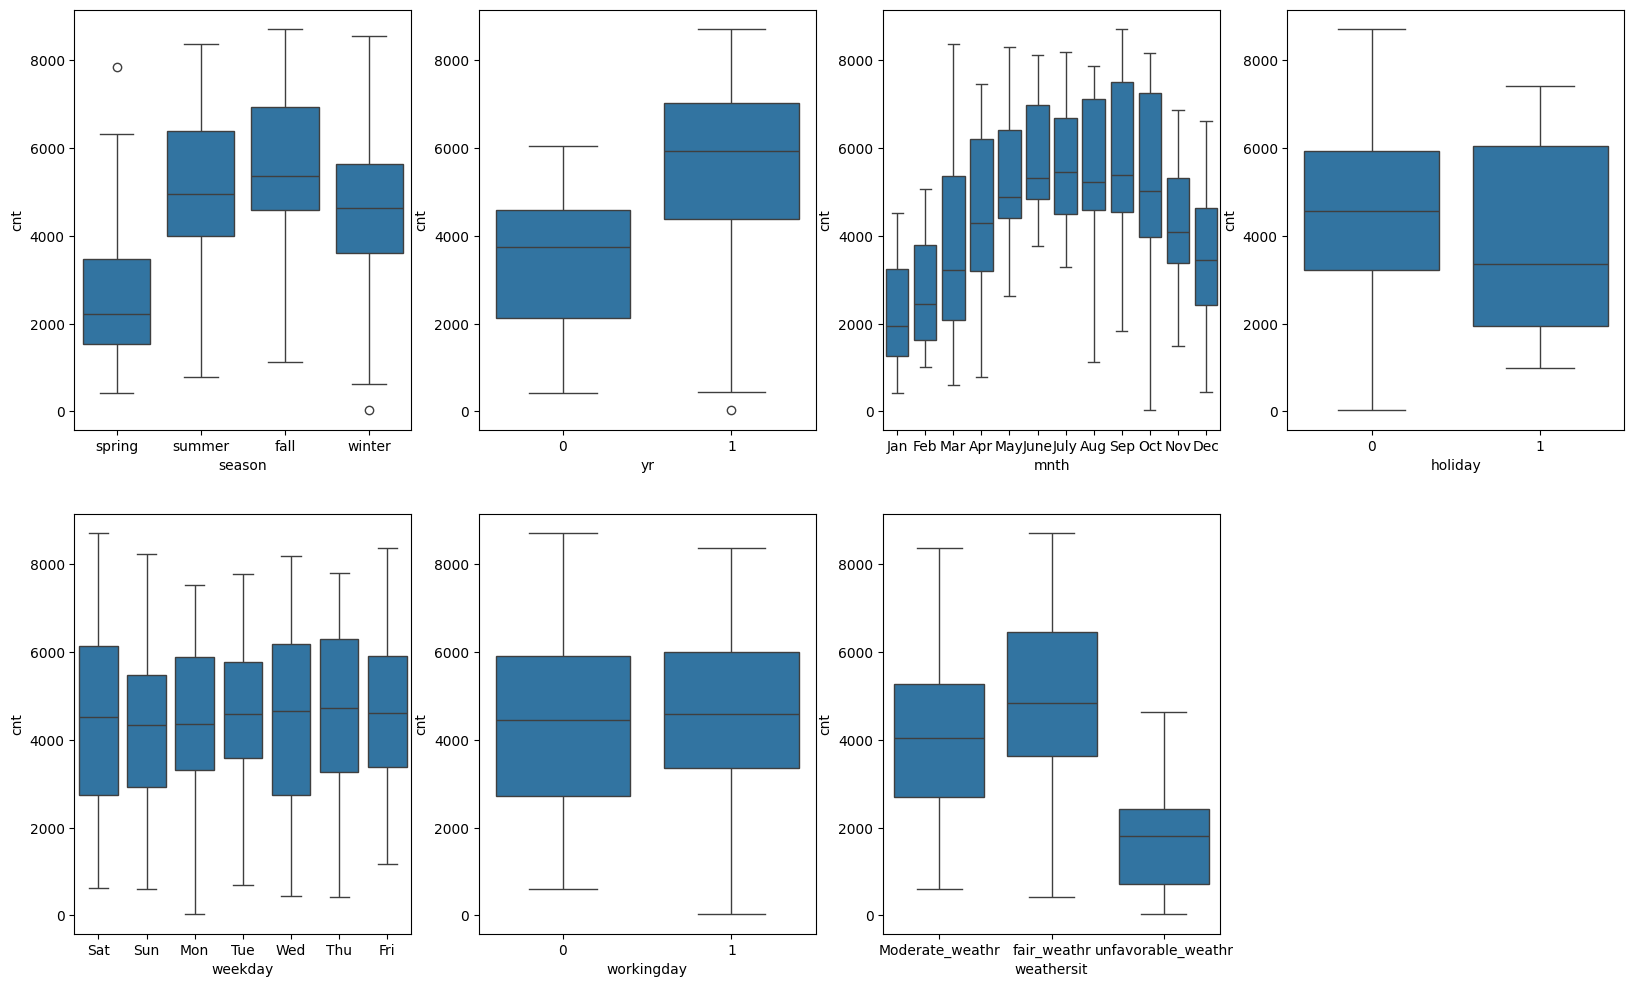

In [27]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = Bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_df)
plt.show()

### <font color= purple>Observations:</font>
- Season: Fall has the highest bookings with a median of over 5000 booking followed by summer, winter and spring. This indicates that season can be a good predictor for the target variable.
- yr - According to the dictionary the year 2018 is represented by '0' and 2019 by '1'. We see that the year 2019 recorded more bookings.
- mnth: We see that the months April, May, June, July, August, September and October record bookings with a median of over 4000. Also, we see that the median of
bookings rises from the month of feb, reaches its peak at july and then gradually falls as the months go by.
- holiday: According to the dictionary 1 indicates that it is a holiday and 0 indicates that it is not. According to the boxplot above most of the bike booking occurs when it is not a holiday.
- weekday: All the days of the week record bookings in the median range of 4000 to 5000.
- workingday: The median bookings are slightly higher on working days.
- weathersit:
  Majority of the bookings occur in fair_weather situations i.e. when it is Clear, Few clouds, Partly cloudy, Partly cloudy. The moderate weather situation records the second highest bookings followed by unfavorable weather. Weather situations show clear trends in bookings and hence can be a good predictor variable.


### More Bivariate analysis on categorical variables 

In [65]:
def plt_cat_column(column):
    # Create a figure with two subplots
    plt.figure(figsize=(12, 6))

    # Subplot 1: Bar plot without year-wise differentiation
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=Bike_df)
    plt.title(f'{column.capitalize()} Impact on Bike Demand (Both Years)')
    plt.xlabel(f'{column.capitalize()}')
    plt.ylabel('Bike Bookings (cnt)')

    # Subplot 2: Bar plot with year-wise differentiation
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=Bike_df, hue='yr', palette=['#FF9999', '#66B2FF'])
    plt.title(f'{column.capitalize()} Impact on Bike Demand (2018 vs 2019)')
    plt.xlabel(f'{column.capitalize()}')
    plt.ylabel('Bike Bookings (cnt)')
    plt.legend(title='Year', labels=['2018', '2019'])

    # Adjust layout for better appearance
    plt.tight_layout()
    
    # Show the plots
    plt.show()


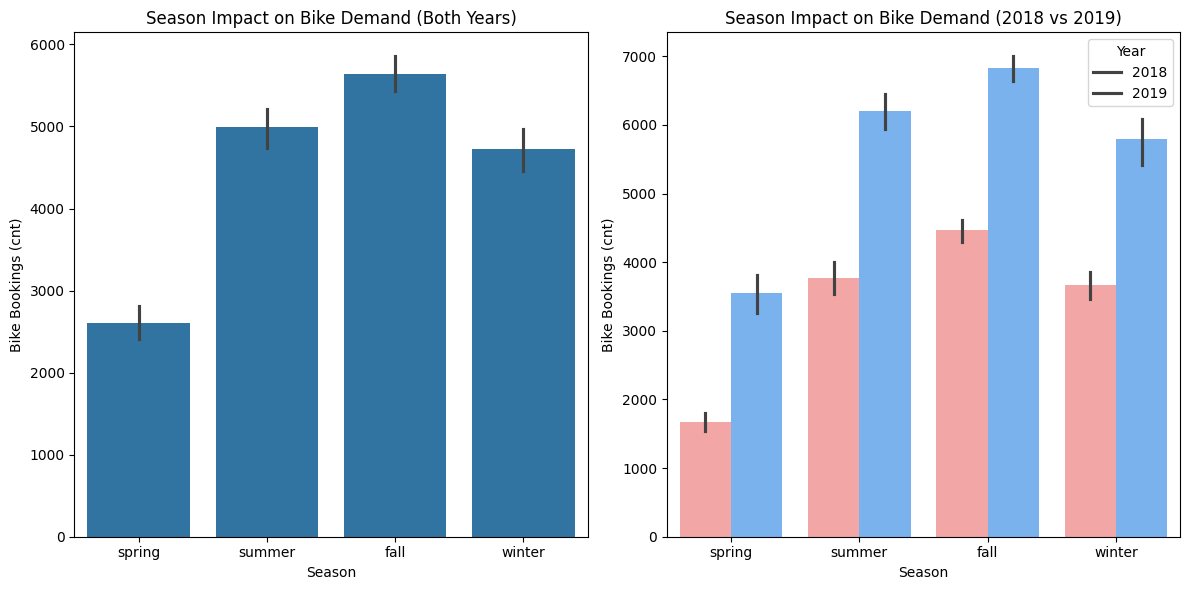

In [66]:
# Plotting bar graphs for 'season'
plt_cat_column('season')

### <font color= purple>Observations:</font>
- Fall has the most bookings. Followed by summer, winter and spring. 
- The number of bookings increased by a large measure from 2018 to 2019 in each seasons. 

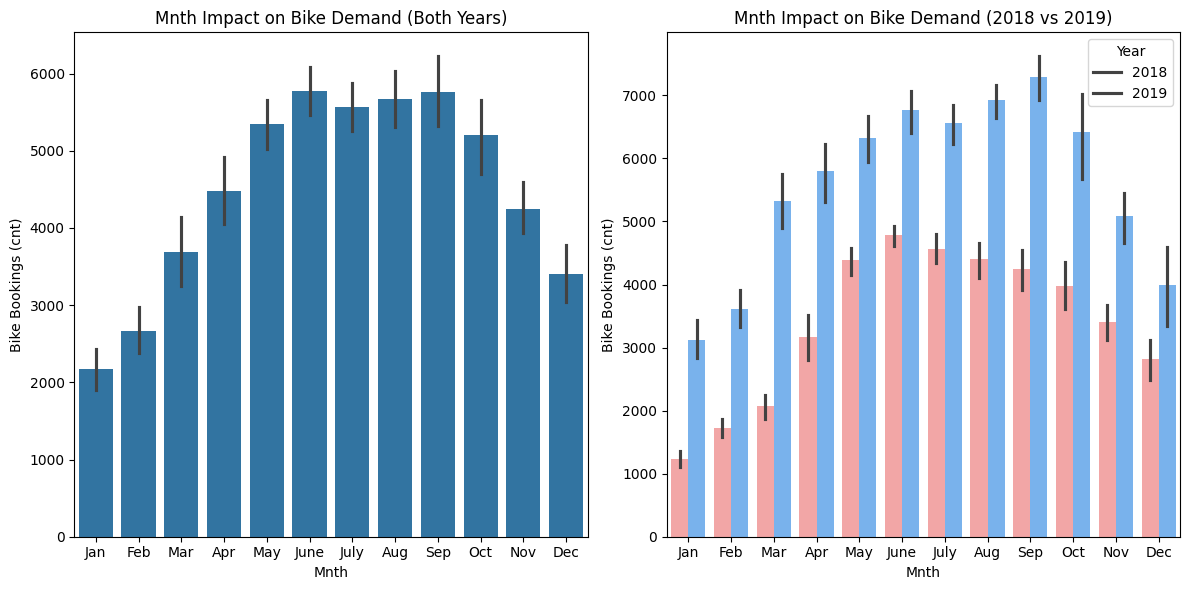

In [67]:
# Plotting bar graphs for 'mnth'
plt_cat_column('mnth')

### <font color= purple>Observations:</font>
- June and September received the highest bookings whereas Jan received the least number of bookings. 
- We see similar booking trend by months in both 2018 and 2019 with the exception that the number of bookings are visobly more in 2019. 

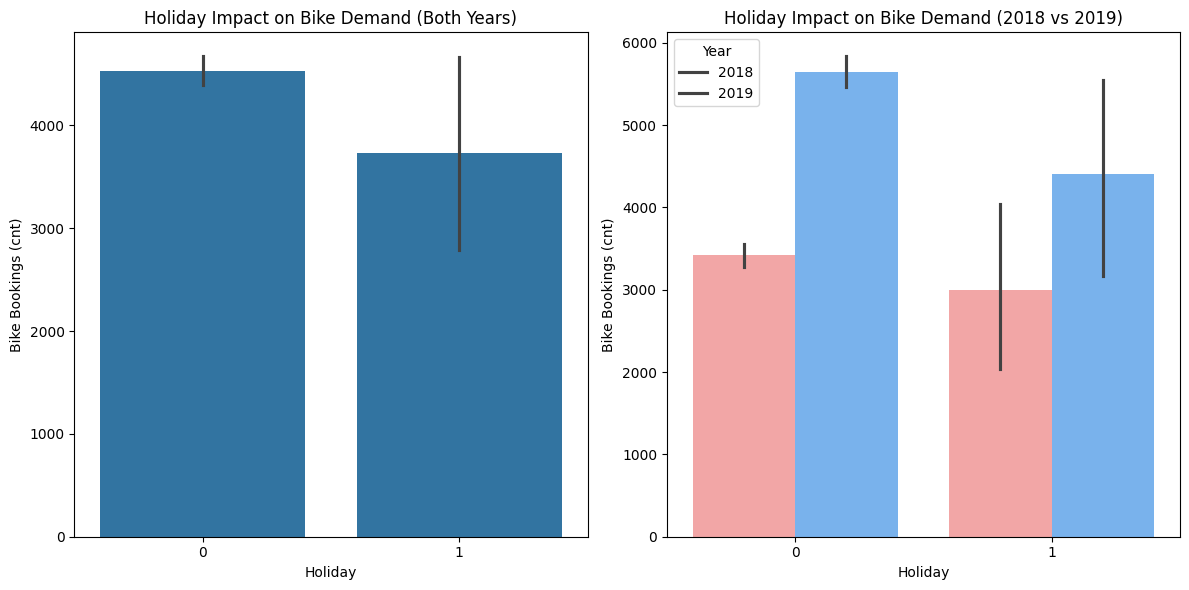

In [68]:
# Plotting bar graphs for 'holiday'
plt_cat_column('holiday')

### <font color= purple>Observations:</font>
- More bookings when it is not a holiday.
- In 2018 we see comparable amount of bookings whether it is a holiday or not whereas in 2019 we observe a shilft in more bookings when it is not a holiday. 

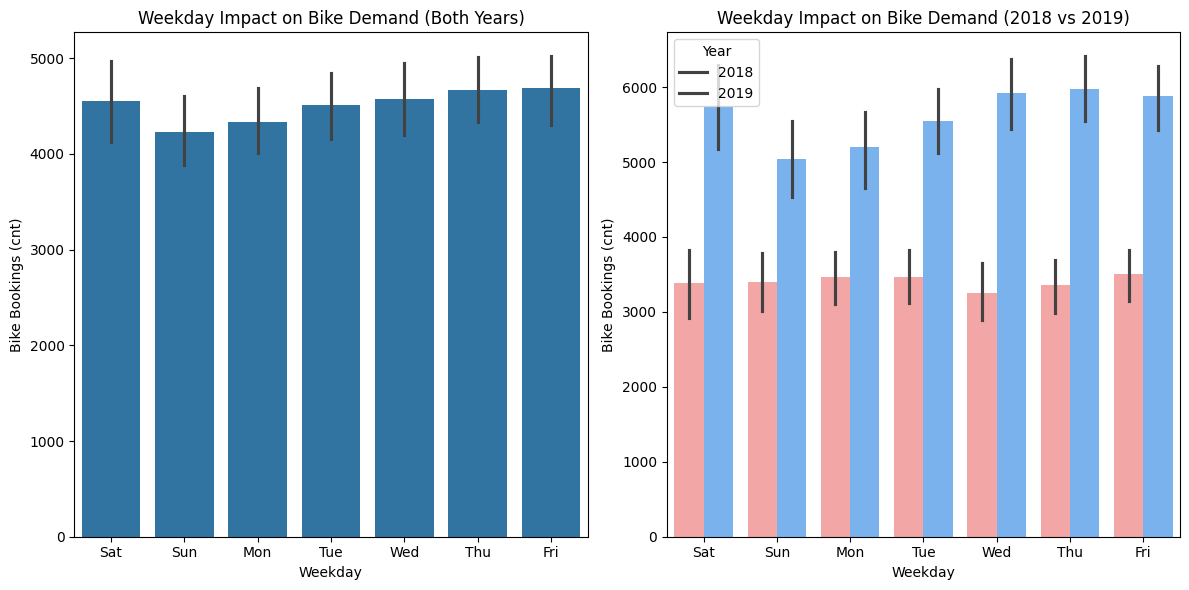

In [69]:
# Plotting bar graphs for 'weekday'
plt_cat_column('weekday')

### <font color= purple>Observations:</font>
- Not much drastic variance in bookings with regards to the days of the week. However, Sunday records a slightly low amount of bookings.
- In 2018, all the days of the week have similar bookings with wednesday recording relatively lowest. In 2019, we see a similar trend with Sunday recording the least bookings. 


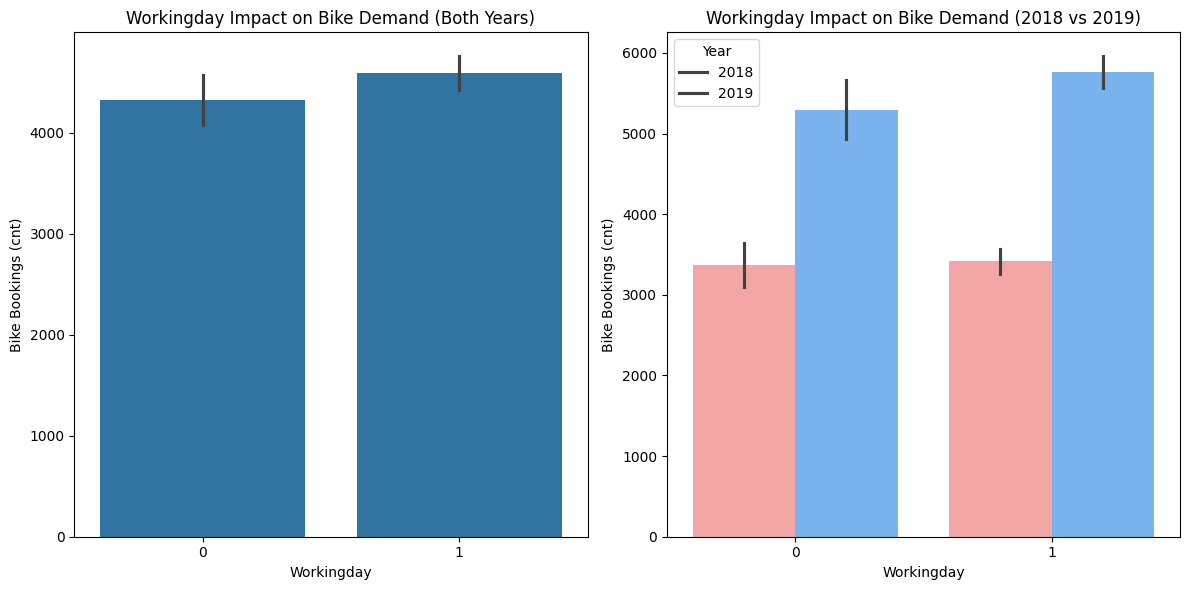

In [70]:
# Plotting bar graphs for 'workingday'
plt_cat_column('workingday')

### <font color= purple>Observations:</font>
- Working days received slightly more bookings than non working days. 
- In 2018, both working and non working days recieved same number of bookings whereas in 2019, working days recieved comparitively more. 

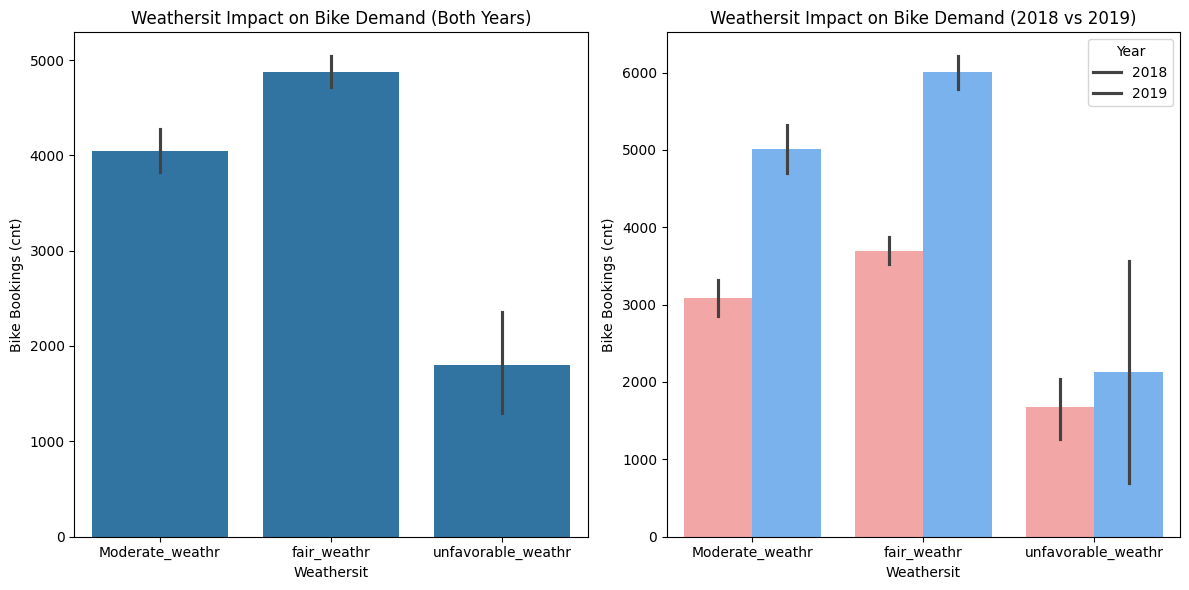

In [71]:
# Plotting bar graphs for 'weathersit'
plt_cat_column('weathersit')

### <font color= purple>Observations:</font>
- Fair_weathr recieved the most bookings and unfavorable_weathr the least. 
- We see the same pattern of bookings in both 2018 and 2019 with again more bookings in 2019 than 2018. 

### Data Preparation

#### Dummy variables creation


In [28]:
# Creating dummy variables for season, mnth, weekdays, weathersit
seasons_df = pd.get_dummies(Bike_df.season,drop_first=True, dtype=int)
mnths_df = pd.get_dummies(Bike_df.mnth,drop_first=True, dtype=int)
weekday_df = pd.get_dummies(Bike_df.weekday,drop_first=True, dtype=int)
weathersit_df = pd.get_dummies(Bike_df.weathersit,drop_first=True, dtype=int)


In [29]:
weathersit_df.head()

,fair_weathr,unfavorable_weathr
0,0,0
1,0,0
2,1,0
3,1,0
4,1,0


In [30]:
seasons_df.head(10)

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [31]:
weekday_df

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


In [32]:
# Merging the dummy columns created above to the main dataframe
Bike_new = pd.concat([Bike_df,seasons_df, mnths_df, weekday_df, weathersit_df,],axis=1)

In [33]:
Bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,fair_weathr,unfavorable_weathr
0,spring,0,Jan,0,Sat,0,Moderate_weathr,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,0
1,spring,0,Jan,0,Sun,0,Moderate_weathr,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,0
2,spring,0,Jan,0,Mon,1,fair_weathr,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,1,0
3,spring,0,Jan,0,Tue,1,fair_weathr,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,1,0
4,spring,0,Jan,0,Wed,1,fair_weathr,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,1,0


In [34]:
Bike_new.shape

(730, 34)

In [35]:
# dropping the original columns for which we just created dummy variables

Bike_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [36]:
Bike_new.shape

(730, 30)

In [37]:
Bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,fair_weathr,unfavorable_weathr
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


In [38]:
Bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  730 non-null    int64  
 1   holiday             730 non-null    int64  
 2   workingday          730 non-null    int64  
 3   temp                730 non-null    float64
 4   atemp               730 non-null    float64
 5   hum                 730 non-null    float64
 6   windspeed           730 non-null    float64
 7   cnt                 730 non-null    int64  
 8   spring              730 non-null    int64  
 9   summer              730 non-null    int64  
 10  winter              730 non-null    int64  
 11  Aug                 730 non-null    int64  
 12  Dec                 730 non-null    int64  
 13  Feb                 730 non-null    int64  
 14  Jan                 730 non-null    int64  
 15  July                730 non-null    int64  
 16  June    

In [39]:
Bike_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'fair_weathr', 'unfavorable_weathr'],
      dtype='object')

### Splitting the Data into Training and Testing Sets
- We will be splitting the data in a 70:30 of Train and test sets using the train_test_split method from sklearn package  sklearn 

In [84]:
# Shape of the dataset before the split
Bike_new.shape

(730, 30)

In [40]:
# Importing the train_test_split from sklearn and splitting the data into 70:30 train and test sets
import sklearn
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(Bike_new, train_size = 0.70, test_size = 0.30, random_state = 100)

In [88]:
df_train.shape

(510, 30)

In [89]:
df_test.shape

(219, 30)

### Scaling the features
We will be using the min-max scaling which will be especially useful if there are extreme data point (outlier).

In [41]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [91]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,fair_weathr,unfavorable_weathr
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,0


In [42]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Fit on the data
df_train[num_vars] =scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,fair_weathr,unfavorable_weathr
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,0


In [43]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,fair_weathr,unfavorable_weathr
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Correlation matrix
Let's look at the correlation among the varibales using heatmap

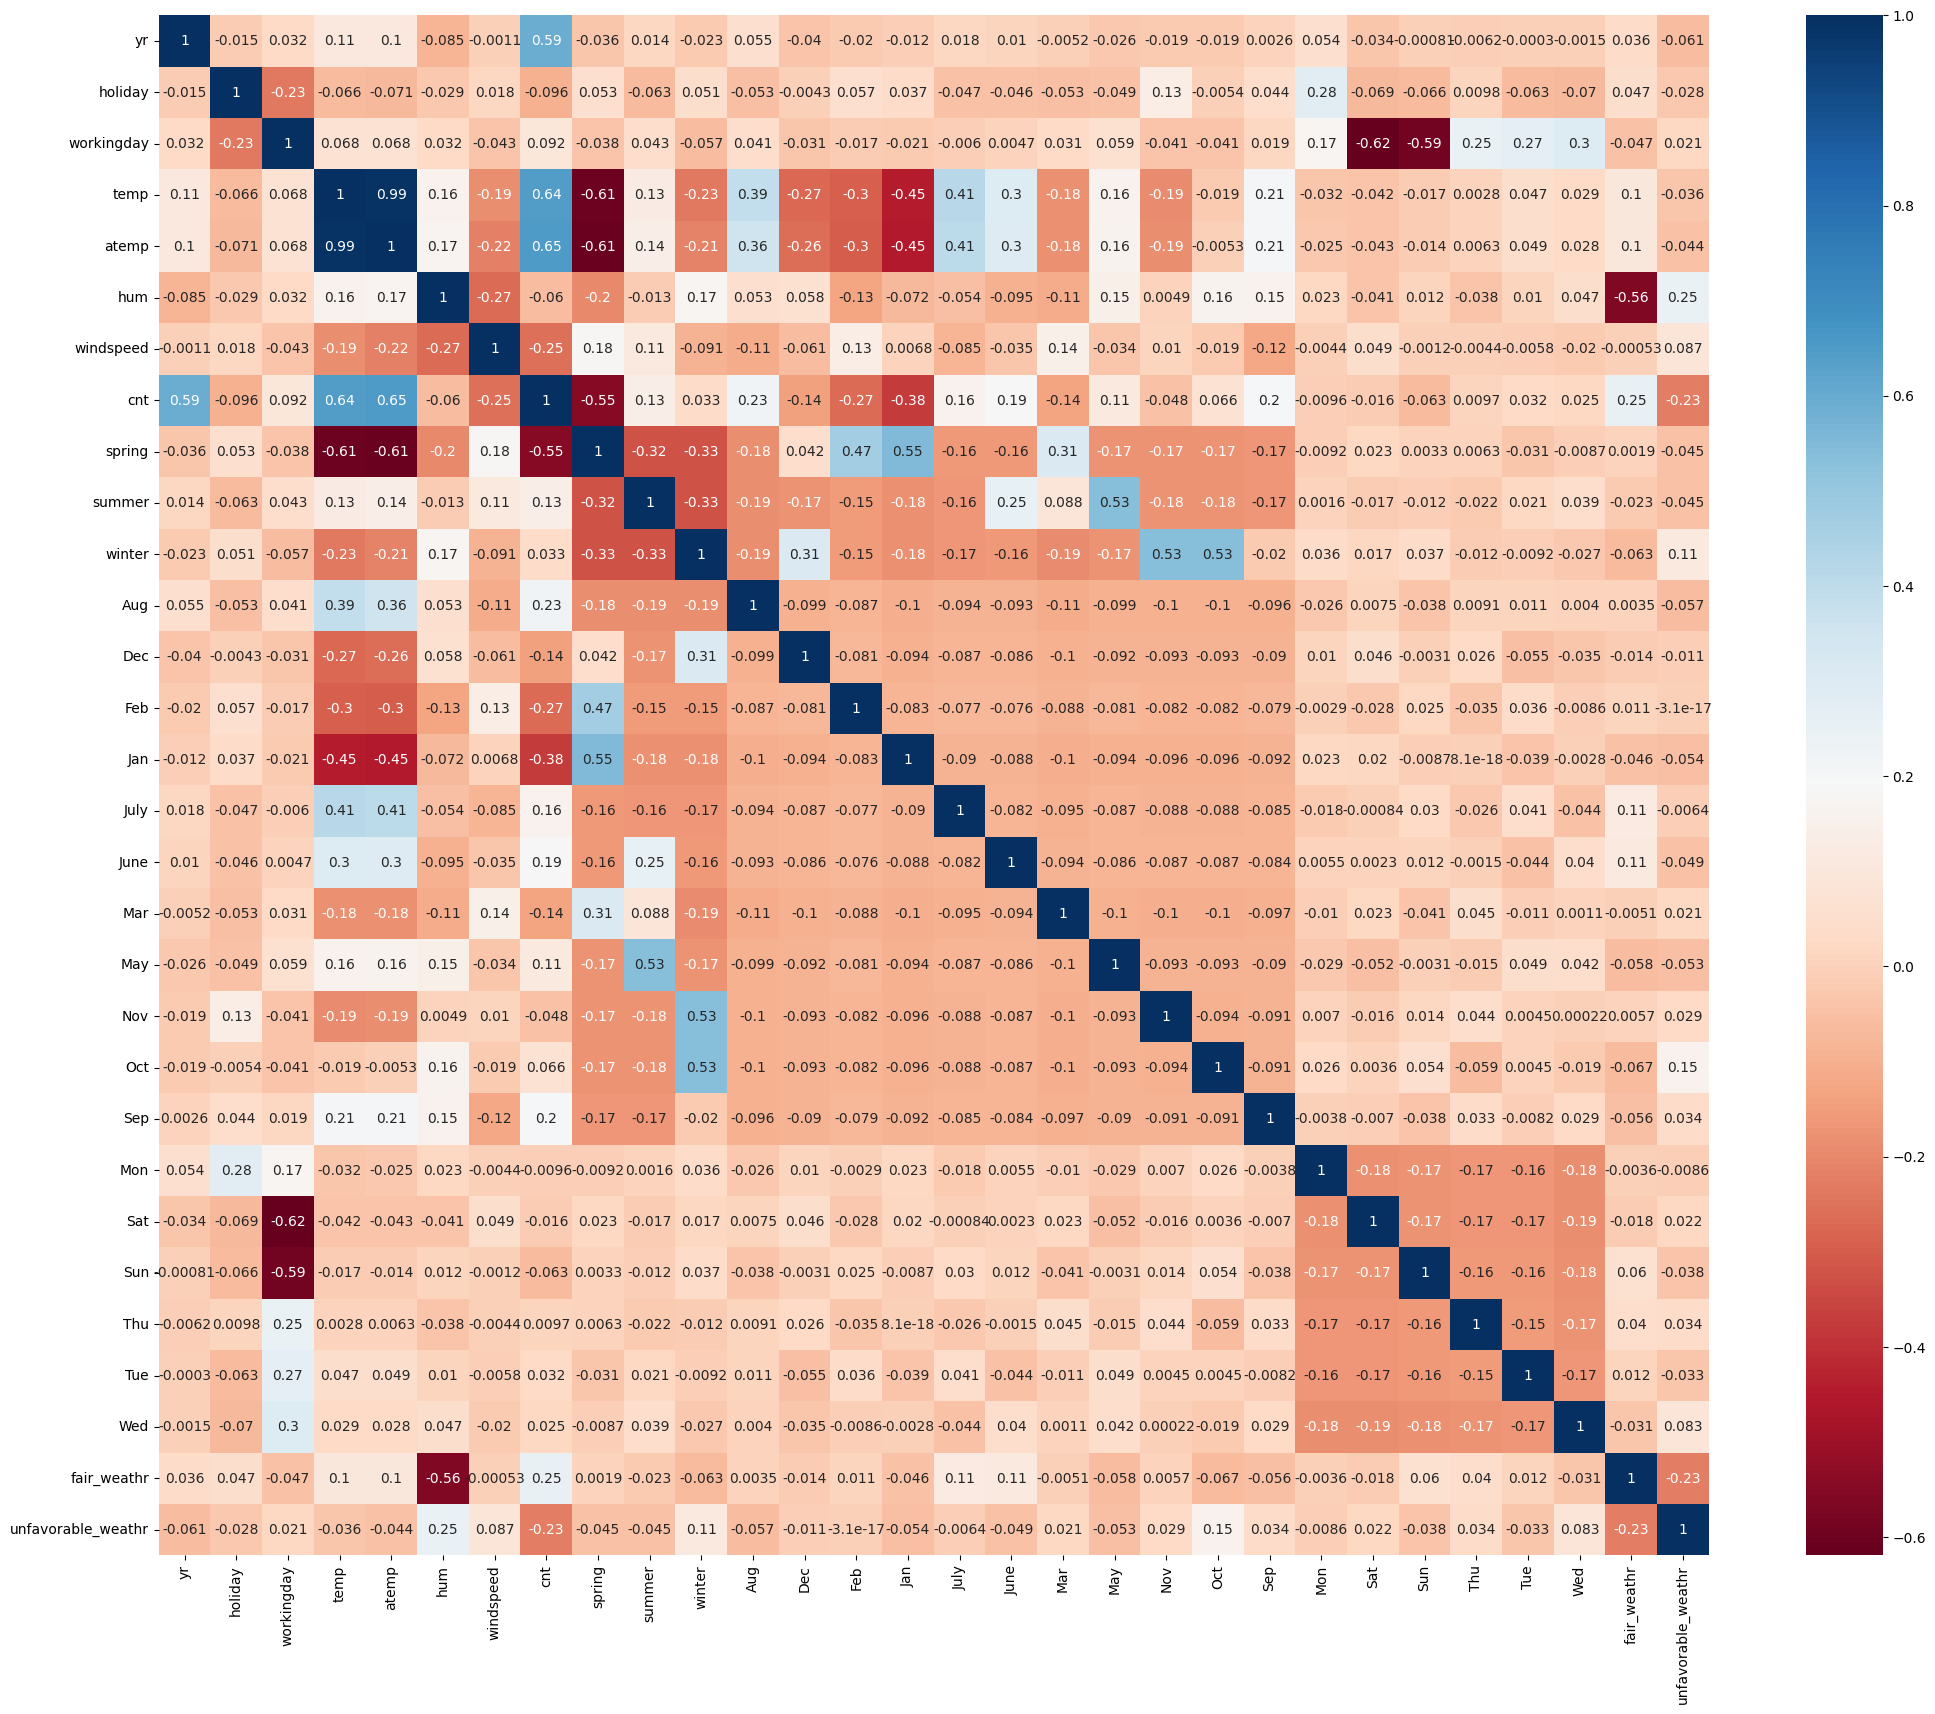

In [94]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdBu")
plt.show()

### <font color= purple>Observations:</font>
- The features temp and atemp are the most positively correlated features with the target variable 'cnt', followed by 'yr'
- The most negatively correlated features with 'cnt' is the feature 'spring', followed by the month 'jan'. 
- As expected the weekdays 'Sat' and 'Sun' show negative correlation with 'workingday'
- 'hum' shows negative correlation with 'fair_weathr'.



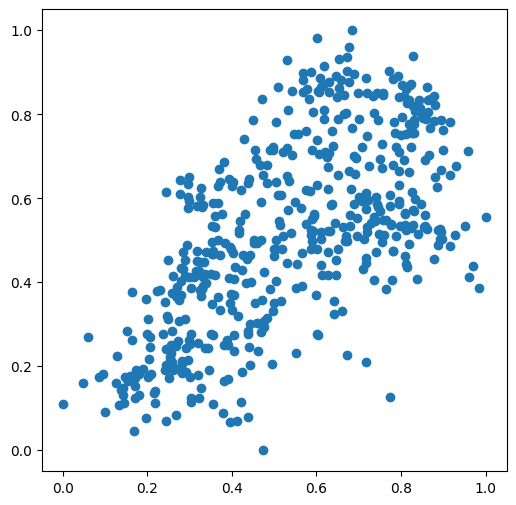

In [96]:
# plotting a scatter plot between cnt and temp to see the linear relationship
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

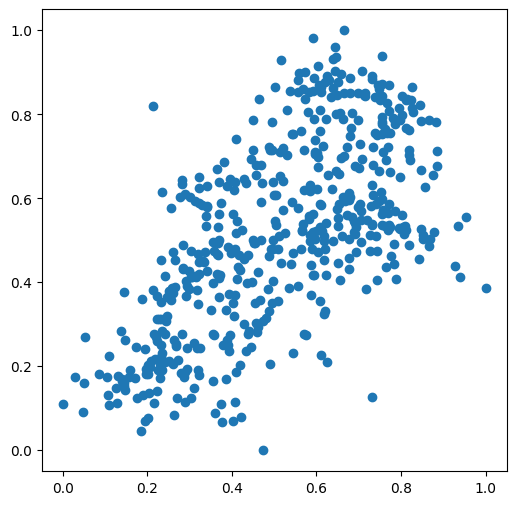

In [97]:
# plotting a scatter plot between cnt and atemp to see the linear relationship
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

## BUILDING A LINEAR MODEL

In [44]:
# Dividing train_df to X and y sets for model building
y_train = df_train.pop('cnt')
X_train = df_train

In [45]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [46]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,fair_weathr,unfavorable_weathr
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### Feature Selection
- First using the automated approach of Recursive Feature Elimination(RFE) and then finishing it up with the manual approach of dropping reduntant variables using Variance Inflation factor(VIF) 

#### Recursive Feature Elimination(RFE):
It is an automated approach which trains the Linear regression model in the back-end. Whatever feature it finds insignificant, it drops them one by one. In this case , RFE will train a model with 30 features and drop whichever one if least significant, then it will again train the model with 29 features and drop the least significant one and so on... It will select the best features based on linear regression. 

In [47]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [48]:
# Runnung RFE to generate 15 output variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [49]:
#Listing out the top 15 variables selected after RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 15),
 ('Mar', False, 14),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 12),
 ('Tue', False, 10),
 ('Wed', False, 13),
 ('fair_weathr', True, 1),
 ('unfavorable_weathr', True, 1)]

In [50]:
# Creating a variable list selected_v consistingof the variables selected after RFE

selected_v = X_train.columns[rfe.support_]
print(selected_v)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'July', 'Sep', 'Sat', 'Sun', 'fair_weathr',
       'unfavorable_weathr'],
      dtype='object')


In [51]:
# The variables rejected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [52]:
# Creating a new X_train dataframe with just the RFE selected variables
X_train_RFE = X_train[selected_v]

#### Variance Inflation factor(VIF)
One of the assumptions of linear regression is that linear regression should not have multi-co-linearity.
Meaning the independent features should not have any co-linearity among them.
VIF is a statistical parameter which tells me whether if my independent features have any correlation or not. the conventionally accepted cut-off of VIF is 5. Theredore, in our case as well, any features with VIF more than 5 will not be part of the model. 

In [53]:
# Importing VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
# Determing the VIFs of all the variables
def calculate_vif(features_df):
    vif = pd.DataFrame()
    vif['Features'] = features_df.columns
    vif['VIF'] = [variance_inflation_factor(features_df.values, i) for i in range(features_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

In [55]:
calculate_vif(X_train_RFE)

,Features,VIF
2,workingday,61.52
11,Sat,14.63
12,Sun,14.25
6,spring,5.02
3,temp,3.62
8,winter,3.49
1,holiday,3.36
7,summer,2.61
4,hum,1.91
13,fair_weathr,1.63


### Building a linear model (using statmodel): Model 1

In [56]:
# 1st regression model
# X_train_lm1['const']=1
X_train_lm1 = sm.add_constant(X_train_RFE)
lr1 = sm.OLS(y_train,X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.13e-191
Time:                        13:47:00   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1526      0

### <font color= purple>Observations:</font>
- Holiday has a p-value of 0.158 which is high and low VIF value of 3.36
- Workingday has a low p-value of 0.00 and very high VIF value of 61.52
- will remove holiday has it has a high value, low vif 

### Model 2
- Removing holiday from the dataframe and building model 2

In [57]:
# Removing 'holiday' from the dataset
X_train_RFE = X_train_RFE.drop(["holiday"], axis = 1)

In [58]:
calculate_vif(X_train_RFE)

,Features,VIF
3,hum,28.11
2,temp,20.59
1,workingday,19.35
5,spring,5.17
10,Sat,5.12
11,Sun,5.00
4,windspeed,4.87
7,winter,3.94
12,fair_weathr,3.65
6,summer,3.11


In [59]:
# 2nd model
X_train_lm2 = sm.add_constant(X_train_RFE)
lr2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.13e-191
Time:                        13:47:09   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1221      0

### <font color= purple>Observations:</font>
- 'hum' has a high VIF of 28.11 and so it will be removed next

### Model 3

In [60]:
# Removing 'hum' from the dataset
X_train_RFE = X_train_RFE.drop(['hum'], axis = 1)

In [61]:
calculate_vif(X_train_RFE)

,Features,VIF
1,workingday,15.86
2,temp,13.30
3,windspeed,4.77
9,Sat,4.38
10,Sun,4.18
4,spring,3.90
11,fair_weathr,2.86
6,winter,2.82
5,summer,2.74
0,yr,2.07


In [62]:
# 3rd model
X_train_lm3 = sm.add_constant(X_train_RFE)
lr3 = sm.OLS(y_train,X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          5.73e-189
Time:                        13:47:15   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0170      0

### <font color= purple>Observations:</font>
- 'workingday' has a high VIF of 15.86 and so it will be removed next

### Model 4

In [63]:
# Removing 'workingday' from the train set
X_train_RFE = X_train_RFE.drop(['workingday'], axis = 1)

In [64]:
calculate_vif(X_train_RFE)

,Features,VIF
1,temp,5.83
2,windspeed,4.64
10,fair_weathr,2.86
4,summer,2.19
3,spring,2.15
0,yr,2.07
5,winter,1.81
6,July,1.59
7,Sep,1.32
8,Sat,1.22


In [65]:
# 4th model
X_train_lm4 = sm.add_constant(X_train_RFE)
lr4 = sm.OLS(y_train,X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.01e-186
Time:                        13:47:23   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1189      0

### <font color= purple>Observations:</font>
- 'Sat' has a high p-value of 0.171 and needs to be removed next

### Model 5

In [66]:
# Removing 'Sat' from the train set
X_train_RFE = X_train_RFE.drop(['Sat'], axis = 1)

In [67]:
calculate_vif(X_train_RFE)

,Features,VIF
1,temp,5.79
2,windspeed,4.62
9,fair_weathr,2.86
4,summer,2.19
3,spring,2.13
0,yr,2.07
5,winter,1.79
6,July,1.59
7,Sep,1.32
8,Sun,1.18


In [120]:
# 5th model
X_train_lm5 = sm.add_constant(X_train_RFE)
lr5 = sm.OLS(y_train,X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.65e-187
Time:                        19:23:55   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1220      0

### <font color= purple>Observations:</font>
- Though 'temp' has a VIF value of 5.79 (which is above 5), we will not remove it yet as we can intuitivlely undersatnd that temperature will have an impact on the bookings and is a strong contender as a predicture feature. 
- Will remove 'July' as it have a p-value of 0.009 and see what happens next. 

### Model 6

In [68]:
X_train_RFE = X_train_RFE.drop(['July'], axis = 1)

In [69]:
calculate_vif(X_train_RFE)

,Features,VIF
1,temp,4.72
2,windspeed,4.62
8,fair_weathr,2.84
0,yr,2.07
3,spring,2.02
4,summer,1.84
5,winter,1.61
6,Sep,1.21
7,Sun,1.17
9,unfavorable_weathr,1.11


In [70]:
# 6th model
X_train_lm6 = sm.add_constant(X_train_RFE)
lr6 = sm.OLS(y_train,X_train_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     250.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.93e-187
Time:                        13:47:42   Log-Likelihood:                 496.10
No. Observations:                 510   AIC:                            -970.2
Df Residuals:                     499   BIC:                            -923.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1154      0

### <font color= purple>Observations:</font>
- Now we can see that all the features have a VIF value below 5.
- The p-values of all the features are practically 0.
- This model looks promising as there is practically no multicollinearity among the features with all of them having significant p-values. 
- The F-statistic of the model is 250.3 and the Prob (F-statistic) is 2.93e-187 which is very low. All these indicate that model is very good. 

### Interpreting the coefficients

In [71]:
lr6.params

const                 0.115449
yr                    0.234324
temp                  0.479893
windspeed            -0.149907
spring               -0.056954
summer                0.061288
winter                0.095113
Sep                   0.085344
Sun                  -0.046247
fair_weathr           0.080314
unfavorable_weathr   -0.206205
dtype: float64

### <font color= purple>Inferences:</font>
- yr: Coefficient of 'yr' is 0.234324 i.e. a unit increase in 'yr', **`increases`** the bookings by 0.234324 units. 
- temp: Coefficient of 'temp' is 0.479893 i.e. a unit increase in 'temp', **`increases`** the bookings by 0.479893 units. 
- windspeed: Coefficient of 'windspeed' is -0.149907 i.e. a unit increase in 'windspeed', `**decreases**` the bookings by 0.149907 units. 
- spring: Coefficient of 'spring' is -0.056954 i.e. a unit increase in 'spring', **`decreases`** the bookings by 0.056954 units. 
- summer: Coefficient of 'summer' is 0.061288 i.e. a unit increase in 'summer', **`increases`** the bookings by 0.061288 units.
- winter: Coefficient of 'winter' is 0.095113 i.e. a unit increase in 'winter', **`increases`** the bookings by 0.095113 units.
- Sep: Coefficient of 'Sep' is 0.085344 i.e. a unit increase in 'Sep', **`increases`** the bookings by 0.085344 units.
- Sun: Coefficient of 'Sun' is -0.046247 i.e. a unit increase in 'Sun', **`decreases`** the bookings by 0.046247 units.
- fair_weathr: Sep: Coefficient of 'fair_weathr' is 0.080314 i.e. a unit increase in 'fair_weathr', **`increases`** the bookings by 0.080314 units.
- unfavorable_weathr: Coefficient of 'unfavorable_weathr' is -0.206205 i.e. a unit increase in 'unfavorable_weathr', **`decreases`** the bookings by 0.206205 units.

## Model Validation
We will validate the model by checking if all the assumptions of the linear regression holds true:
1. Residual analysis: The residuals are normally distributed
2. Partial regression plots: To check if some of the predictor variables display a linear relationship with the target variable. 
3. Multicollinearity: The predictor variables should not be associated with each other. To detect multicollinearity we will calculate the VIF (Variance Inflation Factor) for each predictor. VIF values above 5 may indicate an issue.
4. Homoscedasticity: The residuals should be independent. We have to check for visible patterns in the error terms in order to determine that these terms have a constant variance.
5. R-squared and Adjusted R-squared: From the above summary of the final model, the R-squared and Adjusted R-squared were calculated as 0.834 and 0.830 respectively, which are very good scores and hence indicating that the model is reliable. 

### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [72]:
y_train_pred = lr6.predict(X_train_lm6)

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Errors')

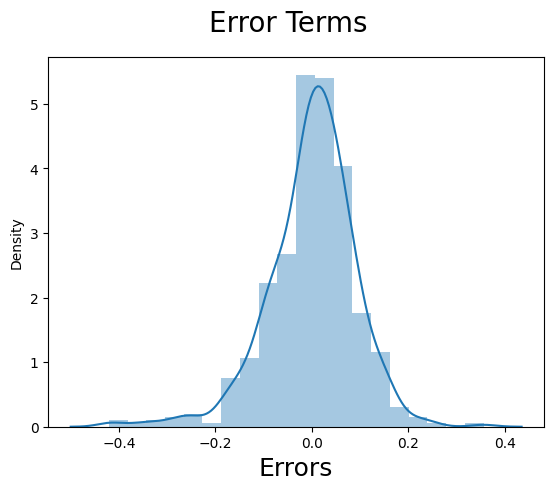

In [74]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

### <font color= purple>Inference:</font>
- From the histogram above, we can see that the residuals are normally distributed and since this assumption of error term normally distributed in this linear regression is correct, **We can now make valid inferences from this model.**

### Partial regression plots

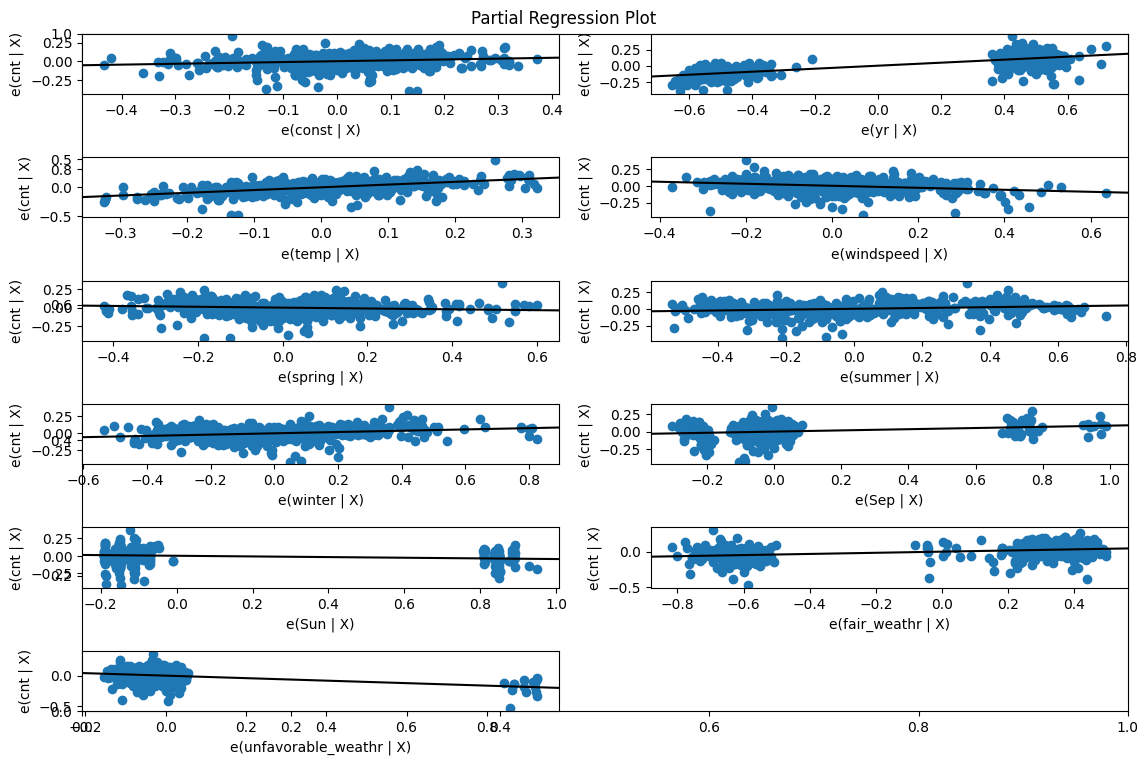

In [141]:
# Plot partial regression plots
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.plot_partregress_grid(lr6, fig=fig)

# Show the plot
plt.show()

### <font color= purple>Inference:</font>
- From the partial regression plots above, we can see that the predictor variables display a linear relationship with the target variable, 'cnt'. Hence, checking one of the assumptions of linear regression as part of model validation

### Multicollinearity
To dectect multicolinearity we will calculate the VIF (Variance Inflation Factor) for each predictor. VIF values above 5 may indicate an issue.

In [75]:
calculate_vif(X_train_RFE)

,Features,VIF
1,temp,4.72
2,windspeed,4.62
8,fair_weathr,2.84
0,yr,2.07
3,spring,2.02
4,summer,1.84
5,winter,1.61
6,Sep,1.21
7,Sun,1.17
9,unfavorable_weathr,1.11


### <font color= purple>Inference:</font>
- All the features in the final model have VIF below 5 and hence have very low or negligible multicollinearity.


### Homoscedasticity

In [76]:
residuals = y_train - y_train_pred

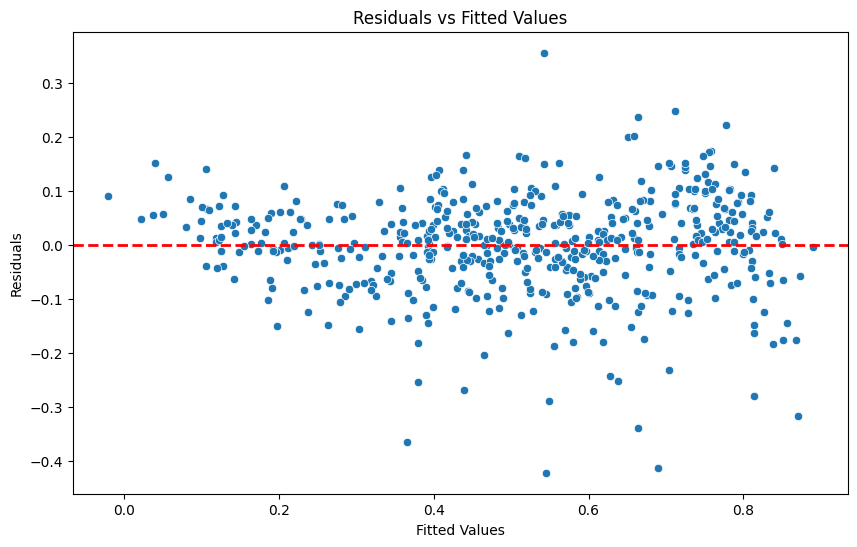

In [77]:
# Plot residuals against fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=lr6.fittedvalues, y=residuals)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.show()

### <font color= purple>Inference:</font>
- The residual values are homoscedastic in nature according to the plot of Residuals vs fitted values above. The error terms do not display any visible patterns but just appear to be evenly distributed noise around zero which is ideal

### Making Predictions Using the Final Model

We have fiited the model of the predictor variables and checked the assumptions, so now, we will make predictions using the final model i.e. model 6 or lr6.   

#### Scaling the test set

In [78]:
# fit(): learns xmax and xmin. This is used on the training dataset not on the test set.
# In real life scenario, test set data will be unknown to us, so the test set is not suppose to teach 
# the model anything. that is the job of the train set. 
# transform(): computes x-xmin/xmax-xmin - used on the test set. Min and max val of the test set will come
# from the training set. 

# Appling transform() on the test set

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [79]:
df_test.shape

(219, 30)

In [80]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,fair_weathr,unfavorable_weathr
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.652968,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.477117,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
# Splitting the test set to X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [82]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  219 non-null    int64  
 1   holiday             219 non-null    int64  
 2   workingday          219 non-null    int64  
 3   temp                219 non-null    float64
 4   atemp               219 non-null    float64
 5   hum                 219 non-null    float64
 6   windspeed           219 non-null    float64
 7   spring              219 non-null    int64  
 8   summer              219 non-null    int64  
 9   winter              219 non-null    int64  
 10  Aug                 219 non-null    int64  
 11  Dec                 219 non-null    int64  
 12  Feb                 219 non-null    int64  
 13  Jan                 219 non-null    int64  
 14  July                219 non-null    int64  
 15  June                219 non-null    int64  
 16  Mar         

In [83]:
#Applying the filtered variables that remained in the final train model
selected_cols = X_train_RFE.columns
X_test = X_test[selected_cols]

In [84]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   const               219 non-null    float64
 1   yr                  219 non-null    int64  
 2   temp                219 non-null    float64
 3   windspeed           219 non-null    float64
 4   spring              219 non-null    int64  
 5   summer              219 non-null    int64  
 6   winter              219 non-null    int64  
 7   Sep                 219 non-null    int64  
 8   Sun                 219 non-null    int64  
 9   fair_weathr         219 non-null    int64  
 10  unfavorable_weathr  219 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 20.5 KB


In [85]:
# Making predictions using the final model 

y_pred_m6 = lr6.predict(X_test_lm)

### MODEL EVALUATION

Text(0, 0.5, 'y_pred')

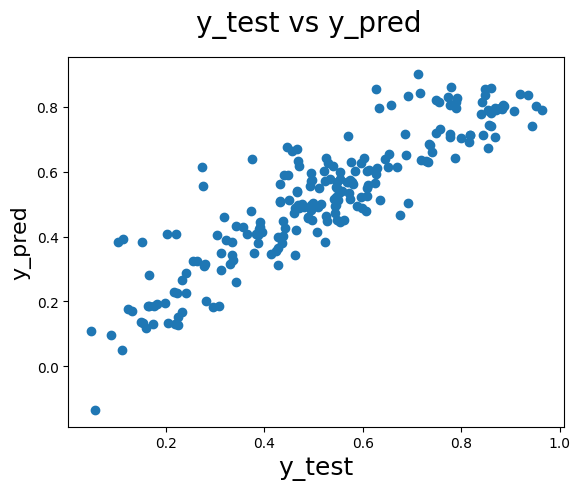

In [86]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m6)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

Text(0, 0.5, 'y_pred')

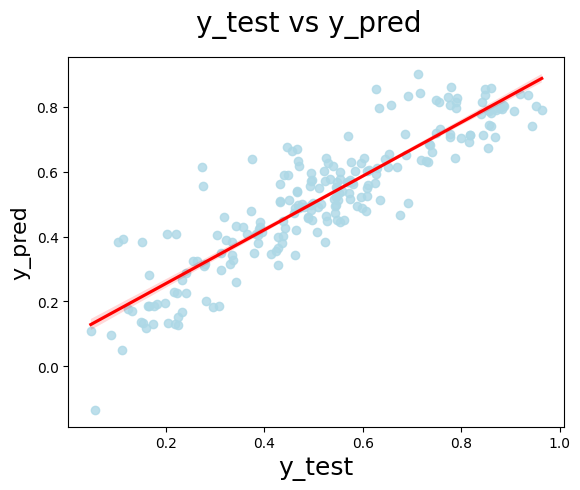

In [87]:
# plotting a Regression plot
fig = plt.figure()
sns.regplot(x=y_test, y=y_pred_m6, ci=68, fit_reg=True,scatter_kws={"color": "lightblue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

### Calculating  R^2 

In [88]:
from sklearn.metrics import r2_score

In [89]:
# Evaluate
r2_score(y_true=y_test, y_pred=y_pred_m6)

0.8028405591555073

### Calculating adjusted R^2

In [90]:
r2 = 0.8028405591555073

In [91]:
# Calculating Adjusted R^2 value for the test dataset

Adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(Adjusted_r2)

0.7934


### Equation for the best fitted line

In [92]:
round(lr6.params,4)

const                 0.1154
yr                    0.2343
temp                  0.4799
windspeed            -0.1499
spring               -0.0570
summer                0.0613
winter                0.0951
Sep                   0.0853
Sun                  -0.0462
fair_weathr           0.0803
unfavorable_weathr   -0.2062
dtype: float64

The equation of our best fitted line is:

$ cnt = 0.1154 + 0.2343  \times  yr + 0.4799  \times  temp - 0.1499 \times windspeed - 0.0570 \times spring + 0.0613 \times summer + 0.0951 \times winter + 0.0853 \times Sep - 0.0462 \times Sun - 0.0803 \times weathersit_2 - 0.2865 \times weathersit_3 $


## Comparison between train and test dataset
- Train R<sup>2</sup> : 0.834
- Test R<sup>2</sup>: 0.8028
- Train Adjusted R<sup>2</sup>: 0.830
- Test Adjusted R<sup>2</sup>: 0.7934

## <font color= Green>Final Report and Recommendation:</font>
- According to our final model, lr6, the top three predictor variables that influence bike bookings are:
  - 1. temp (Temperature):  A unit increase in 'temp', **`increases`** the bookings by 0.4799 units. 
  - 2. yr (year): A unit increase in 'yr', **`increases`** the bookings by 0.2343 units. 
  - 3. unfavorable_weathr: A unit increase in 'unfavorable_weathr', **`decreases`** the bookings by 0.2062 units.

Note: According to the dictionary, unfavorable_weathr = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

#### `The company should focus on the above three variables and consider them while making important business planning and desicions to maximize the number of bookings and hence the profit.`

**`Some suggestions:`** 
- Places where it is warmer (taking temp into account) should be considered while choosing locations to invest in or set up or branch out the bike business. 
- Places with unfavourable weather conditions should be avoid if possible when choosing location to branch out the business. 

 The remaining variables such as 'windspeed', 'winter', 'Sep', 'fair_weathr', 'summer', and 'spring' are also good predictors and hence can be taken into consideration too boost the bookings.
- Be warry of choosing location with high windspeed
- Invest in locations with fair weather conditions.
- Accerelate marketing and ads during summer and winters to boost bookings.
- Improve the marketing strategy targeted during spring season. 
- Provide proper customer care support during high booking months like september. The same goes during summer and winter seasons. 

